<a href="https://colab.research.google.com/github/Prasang-Biyani/Netflix_Recommendation_EDA/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color="red" style="sans-serif"> Netflix </font>

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## <font color="red" style="sans-serif"> Business Problem Statement </font>

Recommend/Propose a type of content(s) (movies or T.V shows) to produce on Netflix to increase user activity. The recommendations could be based on the geographical location (Country/state), most rated genre by the user, most-watched content by a particular director, cast, duration, etc. 

## <font color="red"> Importing required libraries </font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10

In [ ]:
# read dataset
# removing data source for privacy reasons
df = pd.read_csv()

In [ ]:
# Quick glance of the dataset.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Shape
df.shape

(8807, 12)

##<font color="red" style="sans-serif"> Dataset Description: </font>

<font color="cyan">Dataset contains 8K data points and 12 features.</font>

Following are the description of features:

1.   show_id: Unique ID for every movie/T.V Series.
2.   type: Type of content (Movie/T.V Show)
3.   title: Movie/T.V Series title.
4.   director: Director of the movie
5.   cast: Actors/Actresses involved in the movie.
6.   country: Country where the content was produced.
7.   date_added: Date when it was added on Netflix
8.   release_year: Actual release year of the content.
9.   rating: rating of the content.
10.   duration: total duration - in minutes or # of seasons.
11.  listed_in: Genre of the content.
12.  description: Summary of the content.



In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

<font color="cyan"> Here the default data types of all the features are **object** except release year which is in **int64**. </font>

In [ ]:
# Converting some of the attributes to categorical type as they are categories
df['type'] = df['type'].astype("category")

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<font color="cyan"> A quick glance of the **release_year** column, tell us that dataset contains movies/T.V shows from 1925 to 2021, having 50% of the movies were released before 2017. </font>

In [ ]:
# missing values from each column/feature
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Total missing values from the dataset
missing_values_count = df.isna().sum().sum()
print("#missing values from the dataset", missing_values_count)

#missing values from the dataset 4307


In [ ]:
# Percentage of missing values from the dataset
missing_percentage = round((df.isna().sum().sum() / df.shape[0]) * 100, 2)
print("Percentage of missing values from the dataset is", missing_percentage)

Percentage of missing values from the dataset is 48.9


In [ ]:
df['type'].value_counts(normalize=True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

<font color="cyan"> About 69% of data consists of movies while rest of them are T.V showss </font>

In [ ]:
df['country'].value_counts(normalize=True)[:5]

United States     0.353310
India             0.121866
United Kingdom    0.052533
Japan             0.030717
South Korea       0.024950
Name: country, dtype: float64

<font color="cyan"> Majority of the content (Movies/TV Show) are produced in U.S making 35% contribution globally, while rest of them are coming from other countries. </font>

In [ ]:
df['rating'].value_counts(normalize=True)[:5]

TV-MA    0.364308
TV-14    0.245371
TV-PG    0.098035
R        0.090765
PG-13    0.055663
Name: rating, dtype: float64

<font color="cyan">TV-MA is the common movie/T.V show rating having the count of 3207, making it about 36% of the ratings</font>

## <font color="red">Separating movies and T.V show casts</font>

In [ ]:
movie_mask = (df['type'] == "Movie")
movies = df[movie_mask].reset_index().drop(['index', 'show_id', 'show_id', 'type', 'date_added', 
                        'release_year', 'duration', 'description'], axis=1)
movies.head()

,title,director,cast,country,rating,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,PG-13,Documentaries
1,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,PG,Children & Family Movies
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",TV-MA,"Dramas, Independent Movies, International Movies"
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,PG-13,"Comedies, Dramas"
4,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",TV-MA,"Dramas, International Movies"


## <font color="red"> Most frequently casted actor(s) in movies</font>

In [ ]:
# Analysis of Movies Cast
movies_cast = dict()
for listed in movies['cast'].dropna().values:
  for cast in listed.split(','):
    if cast in movies_cast:
      movies_cast[str(cast).strip()] += 1
    else:
      movies_cast[str(cast).strip()] = 1

In [ ]:
movies_cast = sorted(movies_cast.items(), key=lambda x:x[1], reverse=True)
movies_cast[:5]

[('Adam Sandler', 20),
 ('Vatsal Dubey', 16),
 ('Ahmed Helmy', 13),
 ('Samuel West', 11),
 ('Eddie Murphy', 10)]

## <font color="red"> Most frequent movies director</font>

In [ ]:
# Analysis of Movies Director
movies_director = dict()
for listed in movies['director'].dropna().values:
  for director in listed.split(','):
    if director in movies_director:
      movies_director[str(director).strip()] += 1
    else:
      movies_director[str(director).strip()] = 1

In [ ]:
movies_director = sorted(movies_director.items(), key=lambda x:x[1], reverse=True)
movies_director[:5]

[('Rajiv Chilaka', 22),
 ('Suhas Kadav', 16),
 ('Jay Karas', 15),
 ('Marcus Raboy', 15),
 ('Cathy Garcia-Molina', 13)]

## <font color="red">Most frequent genres in Movies</font>

In [ ]:
# Analysis of Movies Director
movies_genre = dict()
for listed in movies['listed_in'].dropna().values:
  for genre in listed.split(','):
    if genre in movies_genre:
      movies_genre[str(genre).strip()] += 1
    else:
      movies_genre[str(genre).strip()] = 1

In [ ]:
movies_genre = sorted(movies_genre.items(), key=lambda x:x[1], reverse=True)
movies_genre[:5]

[('Action & Adventure', 859),
 ('Movies', 57),
 ('Stand-Up Comedy', 26),
 ('Documentaries', 19),
 ('Children & Family Movies', 5)]

## <font color="red">Country which produced most of the movies</font>

In [ ]:
movies['country'].value_counts()[:5]

United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Name: country, dtype: int64

In [ ]:
tv_mask = (df['type'] == "TV Show")
tv = df[tv_mask].reset_index().drop(['index', 'show_id', 'show_id', 'type', 'date_added', 
                        'release_year', 'duration', 'description'], axis=1)
tv.head()

,title,director,cast,country,rating,listed_in
0,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
2,Jailbirds New Orleans,NaN,NaN,NaN,TV-MA,"Docuseries, Reality TV"
3,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
4,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,TV-MA,"TV Dramas, TV Horror, TV Mysteries"


## <font color="red"> Most frequently casted actor(s) in T.V Shows </font>

In [ ]:
# Analysis of TV Show Cast
tv_cast = dict()
for listed in tv['cast'].dropna().values:
  for cast in listed.split(','):
    if cast in tv_cast:
      tv_cast[str(cast).strip()] += 1           
    else:
      tv_cast[str(cast).strip()] = 1

In [ ]:
tv_cast = sorted(tv_cast.items(), key=lambda x:x[1], reverse=True)
tv_cast[:5]

[('David Attenborough', 14),
 ('Michela Luci', 7),
 ('Tara Strong', 4),
 ('You', 4),
 ('Natsuki Hanae', 4)]

## <font color="red" >Most Frequent TV Show director(s) </font>

In [ ]:
# Analysis of TV Director
tv_director = dict()
for listed in tv['director'].dropna().values:
  for director in listed.split(','):
    if director in tv_director:
      tv_director[str(director).strip()] += 1
    else:
      tv_director[str(director).strip()] = 1

In [ ]:
tv_director = sorted(tv_director.items(), key=lambda x:x[1], reverse=True)
tv_director[:5]

[('Alastair Fothergill', 3),
 ('Ken Burns', 3),
 ('Hsu Fu-chun', 2),
 ('Rob Seidenglanz', 2),
 ('Joe Berlinger', 2)]

## <font color="red"> Most Frequent TV Show Genre(s) </font>

In [ ]:
# Analysis of TV Genre
tv_genre = dict()
for listed in tv['listed_in'].dropna().values:
  for genre in listed.split(','):
    if genre in tv_genre:
      tv_genre[str(genre).strip()] += 1
    else:
      tv_genre[str(genre).strip()] = 1

In [ ]:
tv_genre = sorted(tv_genre.items(), key=lambda x:x[1], reverse=True)
tv_genre[:5]

[('British TV Shows', 253),
 ('Anime Series', 176),
 ('TV Shows', 16),
 ('International TV Shows', 8),
 ("Kids' TV", 3)]

## <font color="red"> Most frequent Countries for TV Show </font>

In [ ]:
tv['country'].value_counts()[:5]

United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Name: country, dtype: int64

## <font color="red"> Shifting focus to general features such as date_added, release_year, duration, etc. </font>

In [ ]:
df['date_added'].value_counts()[:5]

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
Name: date_added, dtype: int64

<font color="cyan"> Most of the movies/T.V shows were added on 1st January, 2020 followed by 1st November, 2019 </font>

In [ ]:
df['release_year'].value_counts()[:5]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: release_year, dtype: int64


<font color="cyan"> Few observations here: </font>
 


1.   From the **release_year** analysis, it looks like most of the content was released on 2018, followed by 2017.
2.   But, from the **date_added**, most of them were uploaded on 2020. So, that means on average, there was a gap of 2 years between release year and date_added. 
3.   One reason could be COVID-19, when most of the users were watching from their home rather than going to theatres. So, Netflix might have added more content in 2020.



In [ ]:
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

<font color="cyan"> Most of the times only 1 season has been uploaded on Netflix or the show stopped producing after 1st season. </font>

## <font color="red">Visualizing Analysis</font>

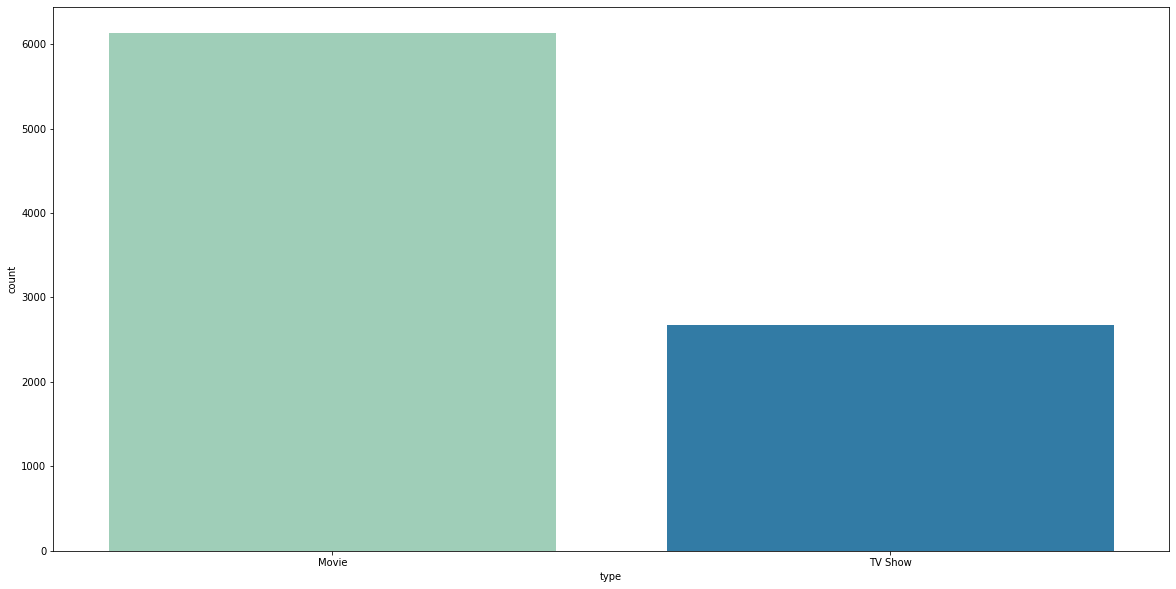

In [ ]:
# Analying type
sns.countplot(data=df, x='type', palette='YlGnBu')
plt.show()

<font color="cyan">Roughly 6K data points consists of movies while 2.5K consists of T.V Series </font>

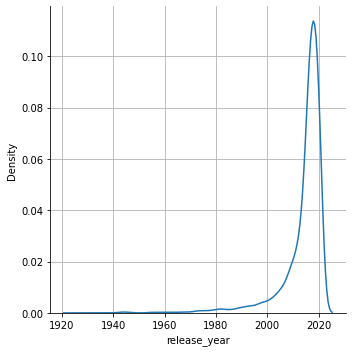

In [ ]:
sns.displot(data=df, x='release_year', palette='YlGnBu', kind='kde')
plt.grid()
plt.show()

<font color="cyan">Most of the movies were roughly released from 2016 onwards, having peak at 2018 as seen from the previous observation </font>

In [ ]:
dates = df[['date_added']].dropna()
dates['month'] = dates['date_added'].apply(lambda x: x.strip().split(',')[0].split()[0])
dates['year'] = dates['date_added'].apply(lambda x: x.strip().split(',')[-1])
dates = dates.drop('date_added', axis=1)

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
year_month = dates.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T.astype(int)

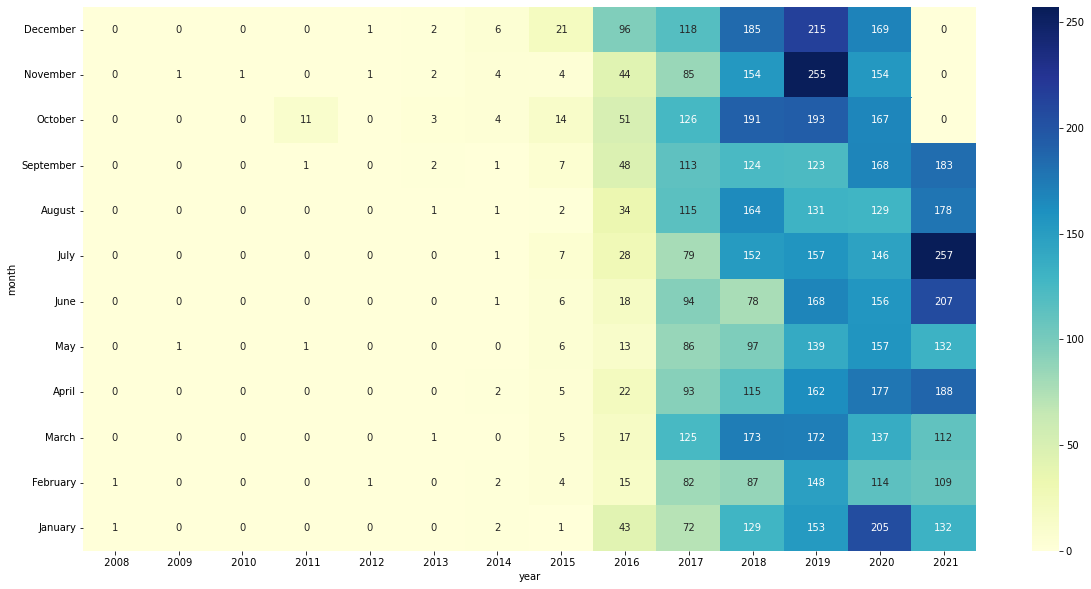

In [ ]:
sns.heatmap(year_month, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

<font color="cyan">In 2018, 2019 & 2020, Netflix has uploaded most of the content during winters. Whereas in Q3, 2021, Netflix uploaded most of the content. From 2008 - 2016, few of the content was release on Netflix.  </font>

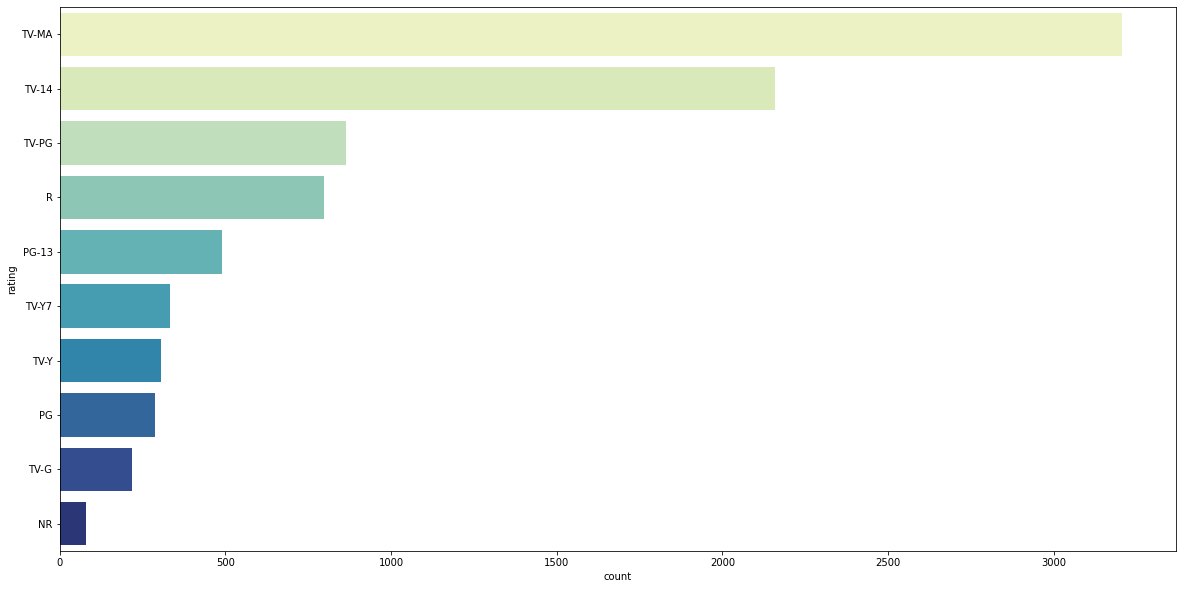

In [ ]:
sns.countplot(data=df, y="rating", order=df['rating'].value_counts().index[0:10], palette="YlGnBu")
plt.show()

<font color="cyan">TV-MA is the most popular rating among 17 different categories, followed by TV-14 & TV-PG respectively.</font>

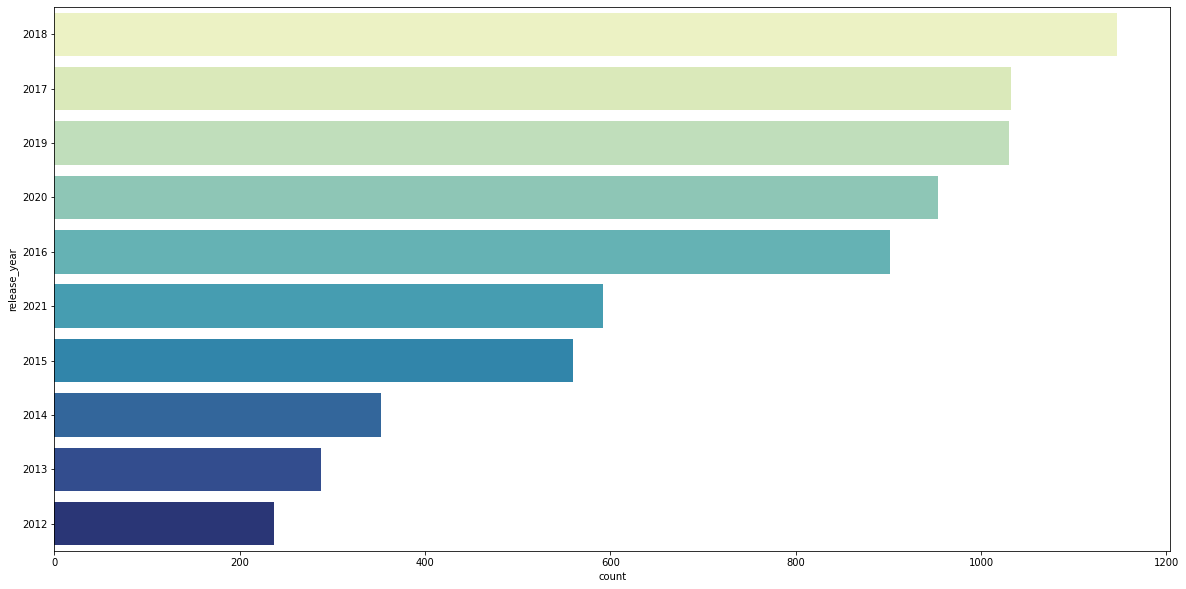

In [ ]:
sns.countplot(data=df, y="release_year", palette="YlGnBu", order=df['release_year'].value_counts().index[0:10])

<font color="cyan">According to the data, most content was release in the year of 2018.</font>

In [ ]:
movie_mask = (df['type'] == "Movie")
movies_duration = df[movie_mask][['duration', 'title', 'country', 'rating']]
movies_duration = movies_duration.dropna()
movies_duration['min'] = movies_duration['duration'].str.split(' ', expand=True)[0]
movies_duration['min'] = movies_duration['min'].astype(int)
movies_duration['hour'] = movies_duration['min'] // 60

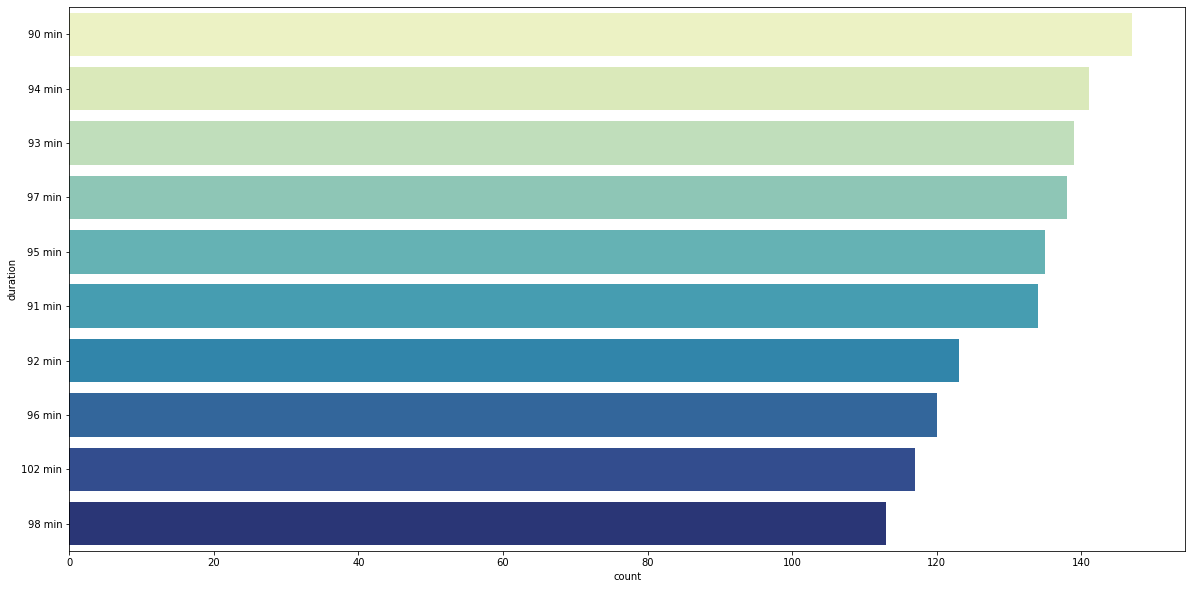

In [ ]:
sns.countplot(data=movies_duration, y='duration', order=movies_duration['duration'].value_counts().index[:10], palette="YlGnBu")
plt.show()

<font color="cyan">1.5 Hrs (90 min) is the most popular duration of movies on Netflix, followed by 94 mins and 93 mins respectively.</font>

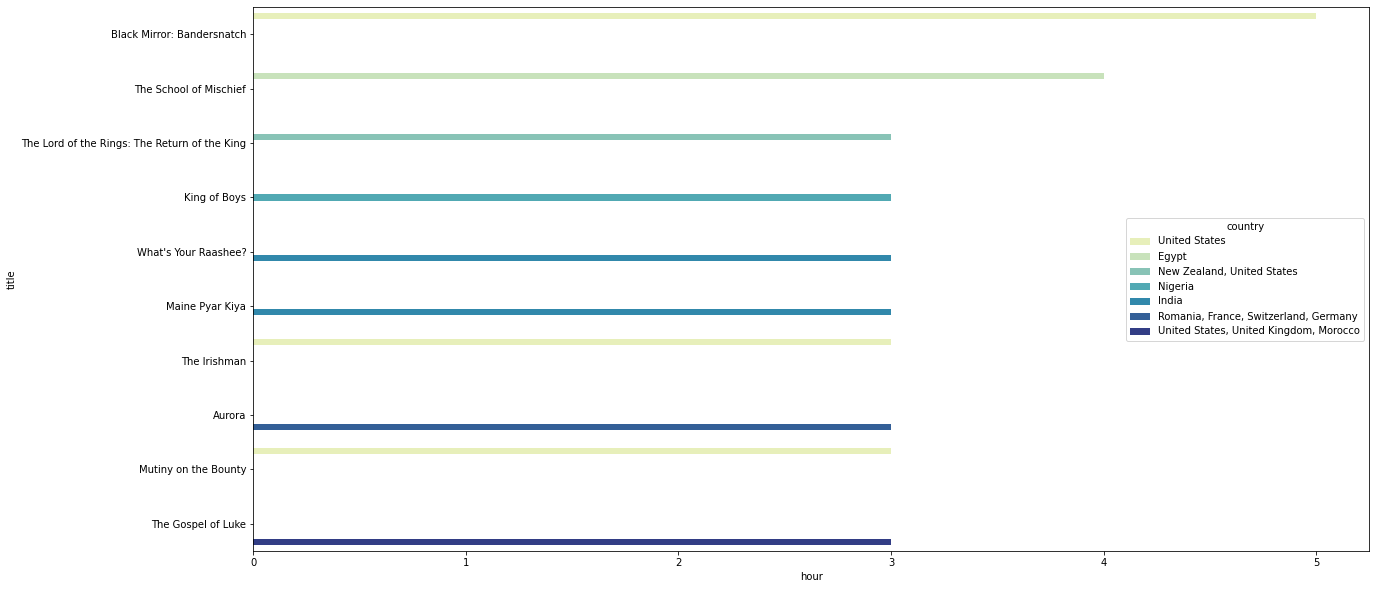

In [ ]:
top_10_movies_by_duration = movies_duration.sort_values(by='hour',ascending=False)[:10]
sns.barplot(data=top_10_movies_by_duration, y='title', x='hour', hue='country', palette="YlGnBu")
plt.show()

<font color="cyan">In Movies, **Black Mirror: Bandersnatch** has the most longest duration in United States, followed by **The School of Mischief** produced in Egypt having the duration of 4 Hrs.</font>

In [ ]:
type_mask = (df['type'] != "Movie")
tv_duration = df[type_mask][['duration', 'title', 'country', 'rating']]
tv_duration = tv_duration.dropna()
tv_duration['season'] = tv_duration['duration'].str.split(' ', expand=True)[0]
tv_duration['season'] = tv_duration['season'].astype(int)

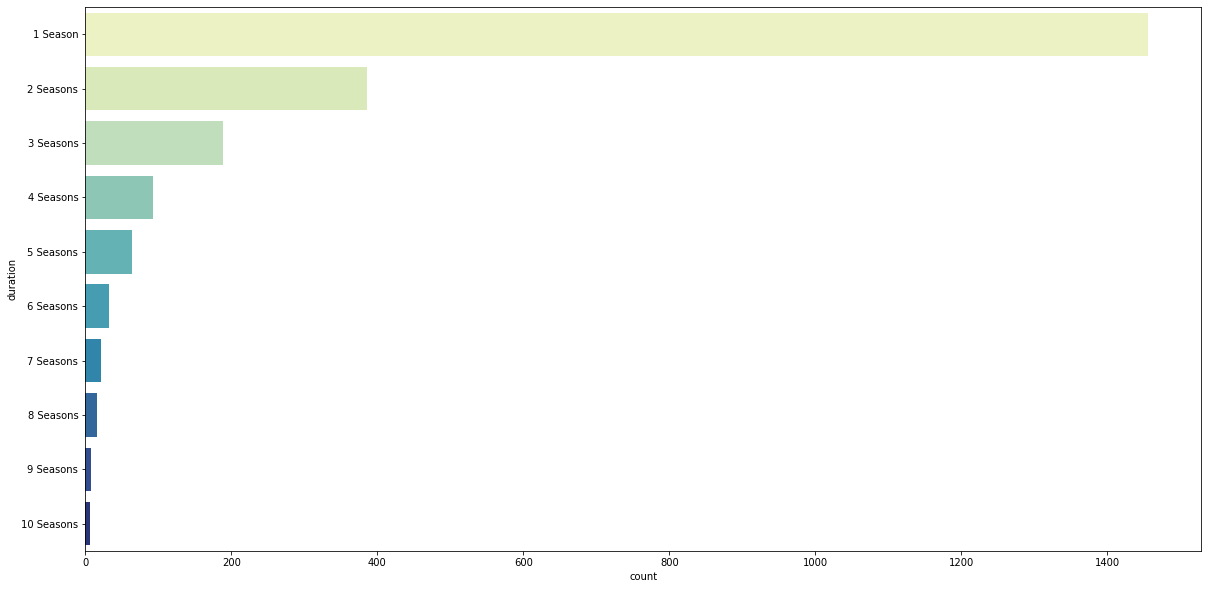

In [ ]:
sns.countplot(data=tv_duration, y='duration', order=tv_duration['duration'].value_counts().index[:10], palette="YlGnBu")
plt.show()

<font color="cyan">In TV Series, most of the content available is premering only 1 season</font>

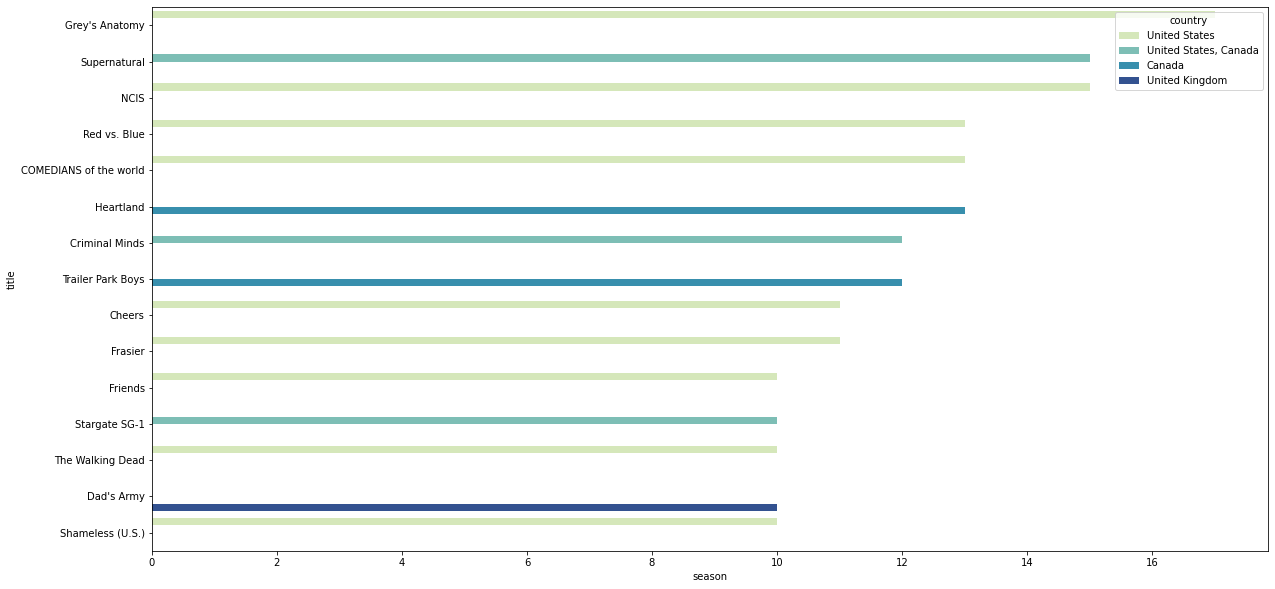

In [ ]:
top_15_tv_by_duration = tv_duration.sort_values(by='season',ascending=False)[:15]
sns.barplot(data=top_15_tv_by_duration, y='title', x='season', hue='country', palette="YlGnBu")
plt.show()

<font color="cyan">Grey's Anatomy has the highest #seasons from United States, followed by Supernatural in United States & Canada</font>

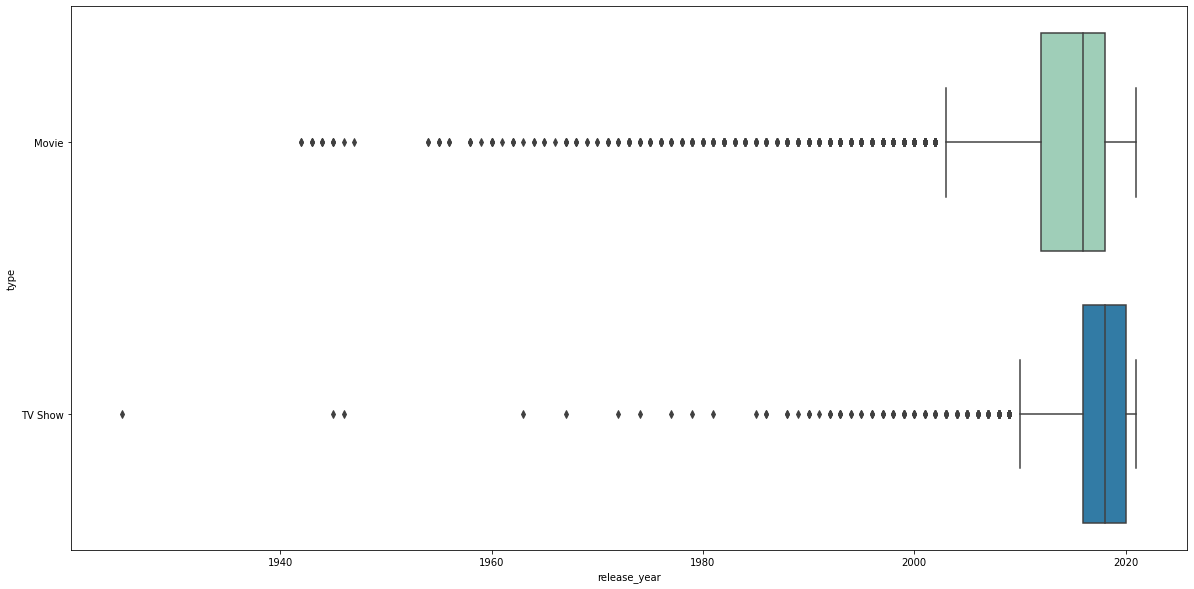

In [ ]:
sns.boxplot(data=df, x='release_year', y='type', palette="YlGnBu")
plt.show()

<font color="cyan">From the data, it looks like we have few outliers in T.V Show release year i.e., starts from 1925, then 2 data points in the range of 1940s-1960s. While, in movies, we can few movies being released in the 1940s-1950s. </font>

In [ ]:
#Interquartile range of movies release year
movies_mask = (df['type'] == "Movie")
movies_release_year = df.loc[movies_mask, 'release_year'].values
IQR_movies = int(np.percentile(movies_release_year, 75) - np.percentile(movies_release_year, 25))
print(f'75th and 25th Release Year (Movie) percentile is {np.percentile(movies_release_year, 75)} & {np.percentile(movies_release_year, 25)} respectively.')
print('Inter Quartile Range (Movies) is', IQR_movies)

75th and 25th Release Year (Movie) percentile is 2018.0 & 2012.0 respectively.
Inter Quartile Range (Movies) is 6


In [ ]:
#Interquartile range of movies release year
tv_mask = (df['type'] != "Movie")
tv_release_year = df.loc[tv_mask, 'release_year'].values
IQR_tv = int(np.percentile(tv_release_year, 75) - np.percentile(tv_release_year, 25))
print(f'75th and 25th Release Year (TV Show) percentile is {np.percentile(tv_release_year, 75)} & {np.percentile(tv_release_year, 25)} respectively.')
print('Inter Quartile Range (TV Show) is', IQR_tv)

75th and 25th Release Year (TV Show) percentile is 2020.0 & 2016.0 respectively.
Inter Quartile Range (TV Show) is 4


## <font color="red">Analysis</font>

1. Most of the content is available in the form of Movies having duration of 90 mins (1.5 Hrs).
2. Majority content is coming from United States & United Kingdom.
3. In Movies, most popular genre is Action & Adventure. In TV Shows, most popular genre is British T.V Shows.
4. Most of the content was uploaded during the year of 2018-2021.
5. TV-MA is the most popular rating among other ratings.
6. Most movies are available in 90 min duration, while T.V Shows are available in single season.


## <font color="red">Recommendations</font>

1. Netflix should focus on adding more movies with duration ranging from 90 - 95 mins.
2. Generally, Q4 & Q1 are the best times to upload content on the platform.
3. TV-MA, TV-14, TV-PG & R are some of the most popular rated contents that should be available.
4. Action & Adventure, British TV Shows, Anime Series, & Comedy are few of the genres that should be featured on the platform.
